In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
df = pd.read_csv("data/CarSalePrice.csv")

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

## Looking at some plots 

In [3]:
import matplotlib.pyplot as plt

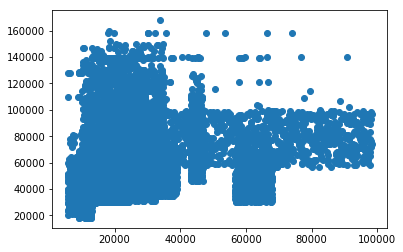

In [9]:
plt.scatter(df['Dist_travelled'], df['SellingPrice'])

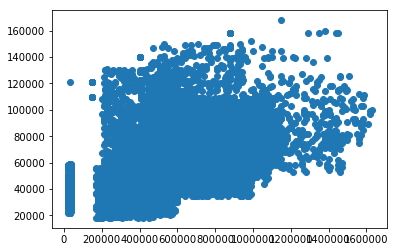

In [10]:
print(plt.scatter(df['InitialBuyingPrice'], df['SellingPrice']))

In [8]:
df['ImportedOrNot'] = df['ImportedOrNot'].astype('category')
df['YearOfRegistration'] = df['YearOfRegistration'].astype('category')
df['Transmission'] = df['Transmission'].astype('category')
df['Fuel'] = df['Fuel'].astype('category')
df['Safetyscore'] = df['Safetyscore'].astype('category')

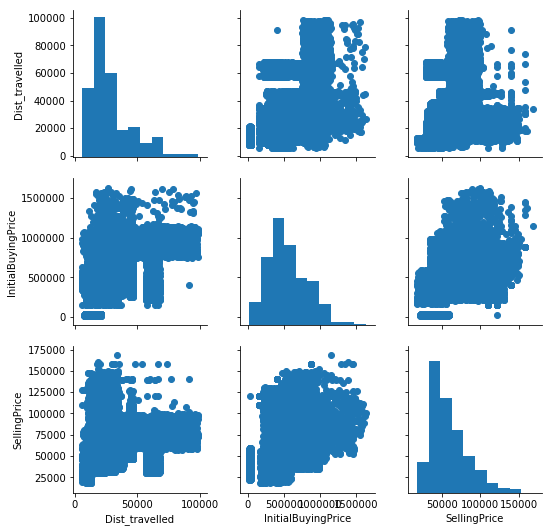

In [13]:
g = sns.PairGrid(df[[ 'Dist_travelled',  'InitialBuyingPrice', 'SellingPrice']])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

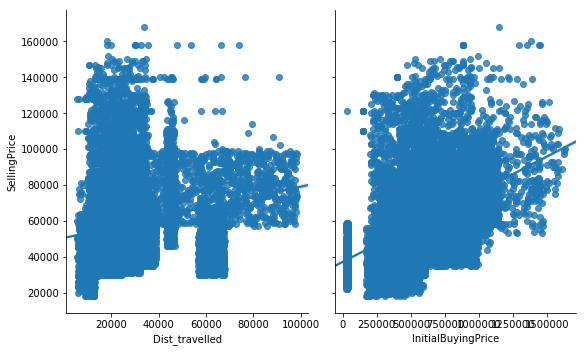

In [14]:
sns.pairplot(df, x_vars=['Dist_travelled', 'InitialBuyingPrice'], y_vars=["SellingPrice"],
             height=5, aspect=.8, kind="reg")

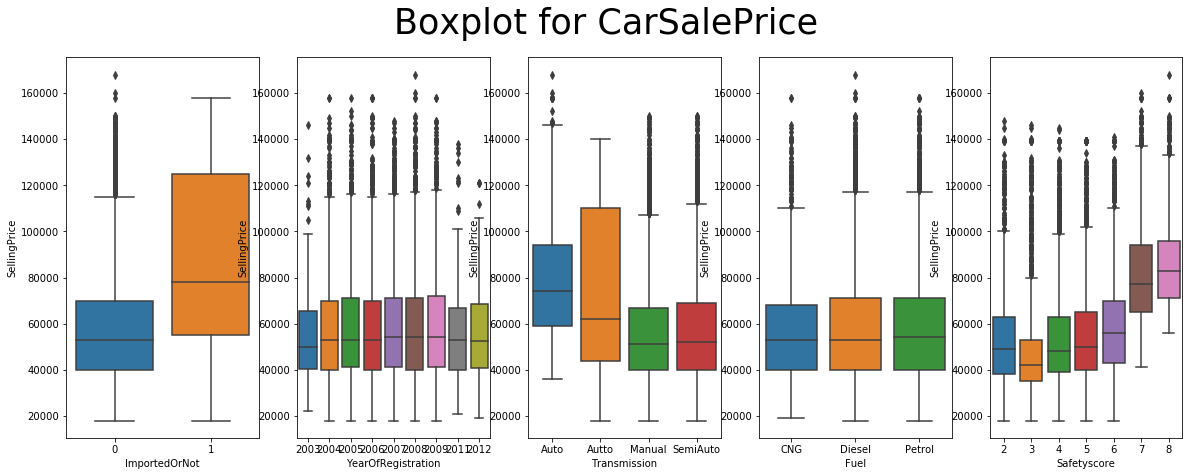

In [15]:
fig, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(1,5,figsize=(20,7))

fig.suptitle("Boxplot for CarSalePrice", fontsize=35)

sns.boxplot(x="ImportedOrNot", y="SellingPrice", data=df,ax=ax1)
sns.boxplot(x="YearOfRegistration", y="SellingPrice", data=df,ax=ax2)
sns.boxplot(x="Transmission", y="SellingPrice", data=df,ax=ax3)
sns.boxplot(x="Fuel", y="SellingPrice", data=df,ax=ax4)
sns.boxplot(x="Safetyscore", y="SellingPrice", data=df,ax=ax5)

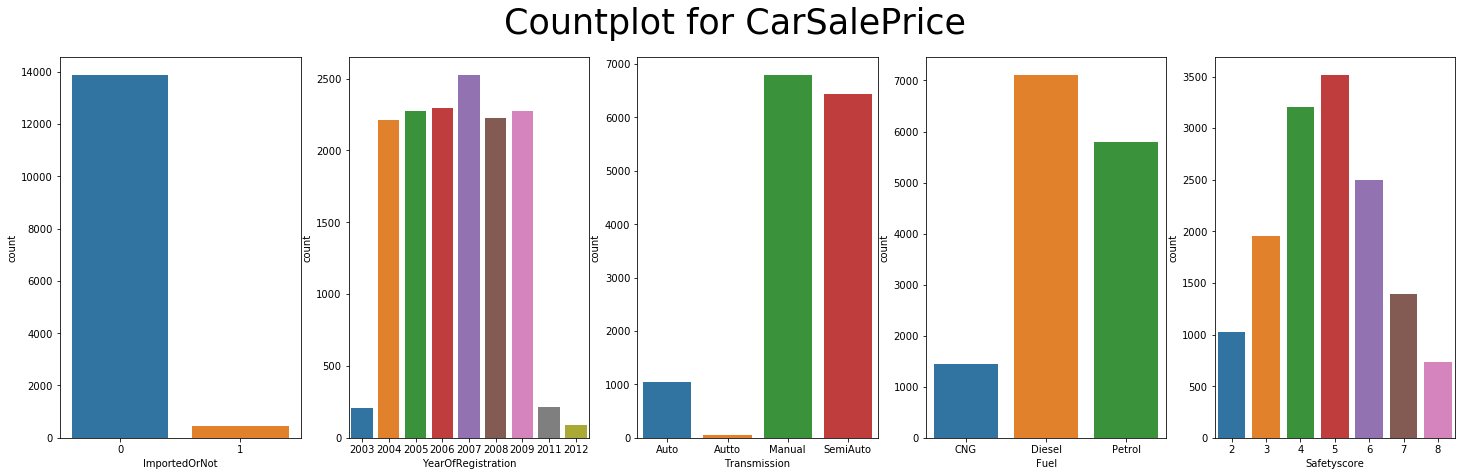

In [16]:
fig, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(1,5,figsize=(25,7))

fig.suptitle("Countplot for CarSalePrice", fontsize=35)

sns.countplot(x="ImportedOrNot", data=df,ax=ax1)
sns.countplot(x="YearOfRegistration", data=df,ax=ax2)
sns.countplot(x="Transmission", data=df,ax=ax3)
sns.countplot(x="Fuel", data=df,ax=ax4)
sns.countplot(x="Safetyscore", data=df,ax=ax5)

Fuel and YearOfRegistration seem to have low predictive power

In [17]:
corr = df.corr()
corr.style.background_gradient()
corr.style.background_gradient().set_precision(2)

,Dist_travelled,InitialBuyingPrice,SellingPrice
Dist_travelled,1,0.32,0.2
InitialBuyingPrice,0.32,1,0.45
SellingPrice,0.2,0.45,1


## Encoding categorical variables

In [9]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
cat_cols = ["ImportedOrNot","Transmission","Safetyscore"] # Dropping Fuel and YearOfRegistration
# cat_cols = ["ImportedOrNot","Transmission","Safetyscore",'Fuel', 'YearOfRegistration']
enc = OneHotEncoder(handle_unknown='ignore', drop='first')
enc_df = pd.DataFrame(enc.fit_transform(df[cat_cols]).toarray())

df = df.join(enc_df)

## Training a linear regressor

In [11]:
X = df.drop(columns=cat_cols+['Fuel', 'YearOfRegistration','SellingPrice'])
y = df['SellingPrice']

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=1/4, random_state=0)
regressor= LinearRegression()
regressor.fit(X_train,y_train)

/Users/arunavade/opt/miniconda3/envs/pytorch/lib/python3.7/site-packages/sklearn/utils/validation.py:1677: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


LinearRegression()

In [14]:
import statsmodels.api as sm
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train,X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           SellingPrice   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     430.4
Date:                Fri, 01 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:59:07   Log-Likelihood:            -1.2152e+05
No. Observations:               10741   AIC:                         2.431e+05
Df Residuals:                   10728   BIC:                         2.432e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5.292e+04   1281

/Users/arunavade/opt/miniconda3/envs/pytorch/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [15]:
y_pred=regressor.predict(X_test)

/Users/arunavade/opt/miniconda3/envs/pytorch/lib/python3.7/site-packages/sklearn/utils/validation.py:1677: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [17]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)**0.5

20175.47818628359